## Prediction using Unsupervised ML

### Problem statement:  Predict the optimum number of clusters from the given ‘Iris’ dataset, and represent it visually.

In [2]:
##Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
df=pd.read_csv("iris.csv",index_col=0)

df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Exploratory Data Analysis

In [17]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [21]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [22]:
# Checking is there any missing values in dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [24]:
df.groupby('Species').sum()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,250.3,170.9,73.2,12.2
Iris-versicolor,296.8,138.5,213.0,66.3
Iris-virginica,329.4,148.7,277.6,101.3


### Data visualization

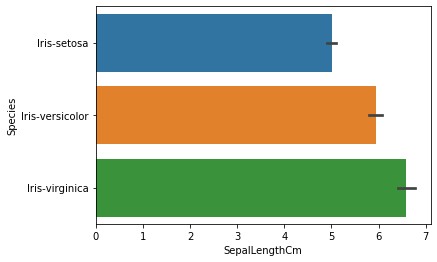

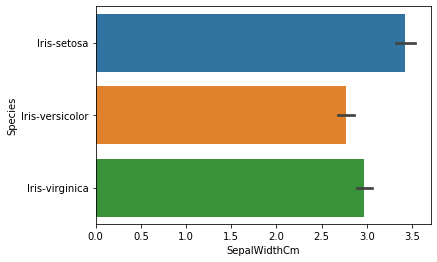

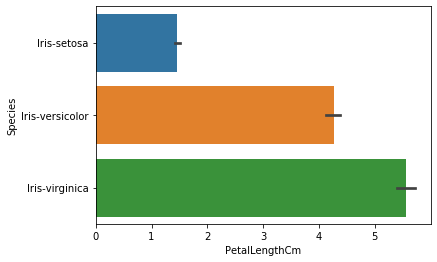

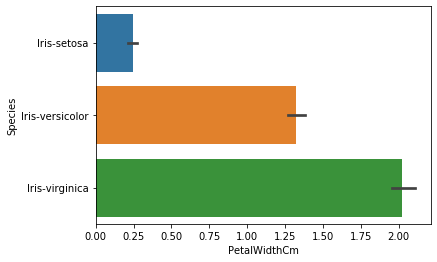

In [27]:
# Plotting different attributes based on their species

features = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

for feature in features:
    sns.barplot(x = feature,y="Species",data=df)
    plt.show()

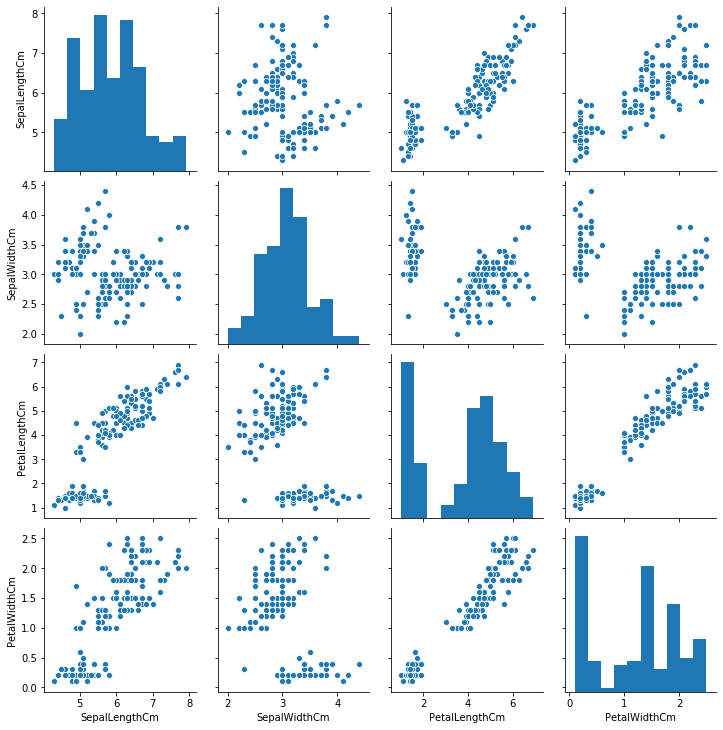

In [28]:
sns.pairplot(df)

### K-Means Clustering

In [30]:
# Extracting the Independent attributes
X = data.iloc[:, [0,1, 2, 3]].values

In [32]:
# Testing different no. of clusters to get the opitmal values
from sklearn.cluster import KMeans
# Creating an Empty list 
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(X)

    # "kmeans.inertia_" --> Returns the error for the specific number of clusters and we append it the empty list.
    wcss.append(kmeans.inertia_)
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

## Elbow Curve

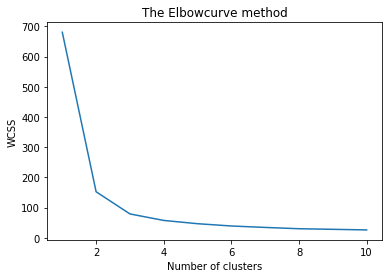

In [33]:
# Plotting the results onto a line graph

plt.plot(range(1, 11), wcss)
plt.title('The Elbowcurve method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

.

* The optimum clusters is where the elbow occurs.
* The within cluster sum of squares (WCSS) is not decresing significantly with every iteration.
* Hence, the optimal number of clusters is '3'

## Visualizing the Clusters

In [40]:
# Creating the kmeans classifier with the optimal number of clusters'3'

kmeans = KMeans(n_clusters = 3,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)

Y_Pred = kmeans.fit_predict(X)

In [41]:
Y_Pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Cluster Centroids

In [42]:
centroids = kmeans.cluster_centers_

print("Centroid values")
print(centroids)

Centroid values
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [43]:
# Total Observation in 3 Clusters
df["Cluster"] = Y_Pred
pd.value_counts(df["Cluster"])

2    62
1    50
0    38
Name: Cluster, dtype: int64

## Visualization of clusters

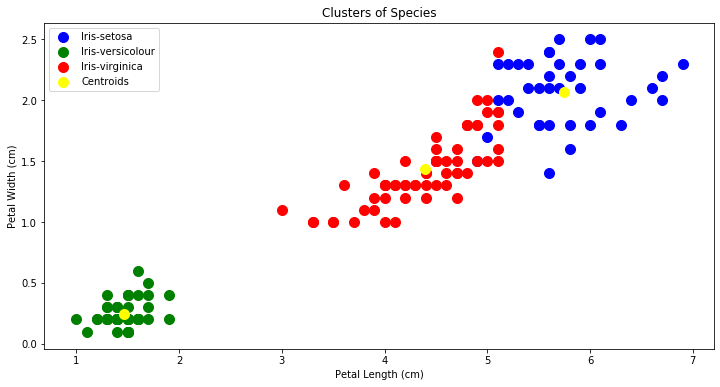

In [45]:
# Visualising the clusters of Petal Length and Petal Width

plt.figure(figsize =(12,6))
plt.scatter(X[Y_Pred == 0, 2], X[Y_Pred == 0, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_Pred == 1, 2], X[Y_Pred == 1, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_Pred == 2, 2], X[Y_Pred == 2, 3], s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the Centroids of Each Custer
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

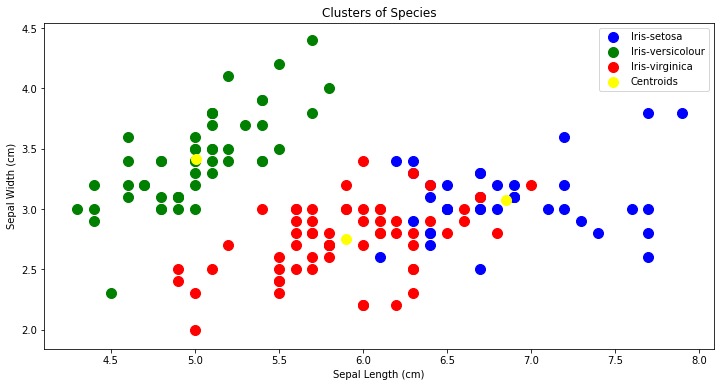

In [46]:
# Visualising the Clusters of Sepal Length and Sepal Width

plt.figure(figsize =(12,6))
plt.scatter(X[Y_Pred == 0, 0], X[Y_Pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_Pred == 1, 0], X[Y_Pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_Pred == 2, 0], X[Y_Pred == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')


# Plotting the Centroid of Each Cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

## Thank you